# Image Classification Exercises with Keras
Using section 5.1 in Deep Learning with Python as a guide, I create a ConvNet model that classifies images in the MNIST digit dataset. Next, using section 5.2 in Deep Learning with Python as a guide, I create a ConvNet model that classifies images CIFAR10 small images classification dataset. I do this twice; once without data augmentation or dropout, and again with. Finally, I use the ResNet50 model to classify various images.

#### Load Packages

In [20]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models
from keras import optimizers
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import pandas as pd
import os
from pathlib import Path
from IPython.core.display import HTML

## ConvNet model that classifies images in the MNIST digit dataset

#### Load Data, Prep Data, Define Model, Compile Model, Fit Model

In [2]:
# load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# One hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define model layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 16s 17ms/step - loss: 0.4267 - accuracy: 0.8626 - val_loss: 0.0663 - val_accuracy: 0.9805
Epoch 2/5
844/844 [==============================] - 13s 16ms/step - loss: 0.0534 - accuracy: 0.9831 - val_loss: 0.0407 - val_accuracy: 0.9882
Epoch 3/5
844/844 [==============================] - 13s 16ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0469 - val_accuracy: 0.9863
Epoch 4/5
844/844 [==============================] - 13s 15ms/step - loss: 0.0262 - accuracy: 0.9919 - val_loss: 0.0413 - val_accuracy: 0.9890
Epoch 5/5
844/844 [==============================] - 13s 16ms/step - loss: 0.0184 - accuracy: 0.9938 - val_loss: 0.0492 - val_accuracy: 0.9880


#### Display Results

313/313 [==============================] - 1s 4ms/step - loss: 0.0363 - accuracy: 0.9898
Test Accuracy:  0.989799976348877
Test Loss:  0.03633994609117508


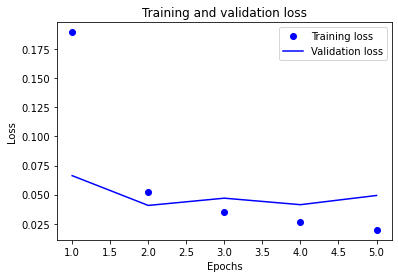

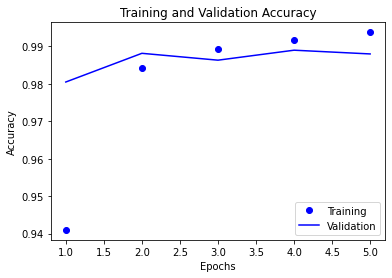

In [3]:
# Test Accuracy and Loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)

# Training and Validation Loss Plot
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf() # clear figure

# Training and Validation Accuracy Plot
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training')
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## ConvNet for CIFAR10 dataset without dropout or data augmentation

#### Load Data

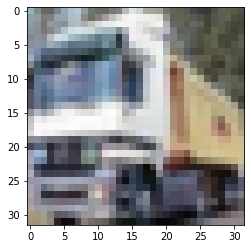

In [9]:
# load data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Plot of one of the training images
plt.imshow(train_images[1])

#### Prep Data

In [10]:
# One hot encode labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Convert from integers to floats and normalize
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

#### Define Model

In [4]:
# Define Model (3 VGG Blocks)
# Reference: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same',
                        input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',
                      kernel_initializer='he_uniform'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         7

#### Complie Model

In [27]:
# Compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Fit Model

In [28]:
# Train model
history = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_split=0.1)

Epoch 1/30
704/704 [==============================] - 34s 47ms/step - loss: 2.0099 - accuracy: 0.2681 - val_loss: 1.5169 - val_accuracy: 0.4456
Epoch 2/30
704/704 [==============================] - 33s 47ms/step - loss: 1.4894 - accuracy: 0.4656 - val_loss: 1.3434 - val_accuracy: 0.5146
Epoch 3/30
704/704 [==============================] - 34s 48ms/step - loss: 1.3209 - accuracy: 0.5296 - val_loss: 1.3049 - val_accuracy: 0.5324
Epoch 4/30
704/704 [==============================] - 34s 48ms/step - loss: 1.1752 - accuracy: 0.5872 - val_loss: 1.1575 - val_accuracy: 0.5898
Epoch 5/30
704/704 [==============================] - 34s 48ms/step - loss: 1.0632 - accuracy: 0.6264 - val_loss: 1.0635 - val_accuracy: 0.6298
Epoch 6/30
704/704 [==============================] - 34s 49ms/step - loss: 0.9736 - accuracy: 0.6564 - val_loss: 1.0121 - val_accuracy: 0.6426
Epoch 7/30
704/704 [==============================] - 34s 48ms/step - loss: 0.8984 - accuracy: 0.6871 - val_loss: 0.9352 - val_accuracy:

#### Display Results

313/313 [==============================] - 3s 11ms/step - loss: 1.7873 - accuracy: 0.7068
Test Accuracy:  0.7067999839782715
Test Loss:  1.7873214483261108


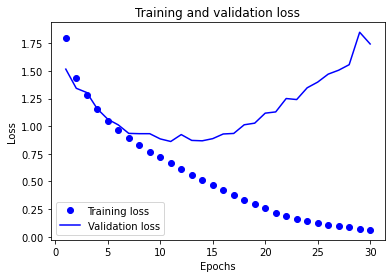

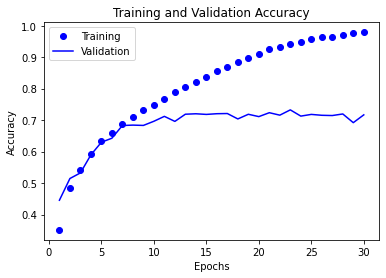

In [29]:
# Test Accuracy and Loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)

# Training and Validation Loss Plot
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf() # clear figure

# Training and Validation Accuracy Plot
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training')
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## ConvNet for CIFAR10 dataset with dropout or data augmentation

#### Define and Compile Model with Dropout

In [11]:
# Define Model (adding drop out)
# Reference: https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same',
                        input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu',
                        kernel_initializer='he_uniform',
                        padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu',
                      kernel_initializer='he_uniform'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

# Compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### Fit Model with Dropout

In [42]:
# Fit Model with Dropout
history = model.fit(train_images, train_labels, batch_size=64, epochs=100, validation_split=0.1)

Epoch 1/100
704/704 [==============================] - 63s 90ms/step - loss: 1.2237 - accuracy: 0.5602 - val_loss: 1.0805 - val_accuracy: 0.6182
Epoch 2/100
704/704 [==============================] - 62s 88ms/step - loss: 1.1661 - accuracy: 0.5801 - val_loss: 1.0859 - val_accuracy: 0.6196
Epoch 3/100
704/704 [==============================] - 61s 87ms/step - loss: 1.1106 - accuracy: 0.6025 - val_loss: 0.9788 - val_accuracy: 0.6618
Epoch 4/100
704/704 [==============================] - 62s 88ms/step - loss: 1.0684 - accuracy: 0.6181 - val_loss: 0.9593 - val_accuracy: 0.6654
Epoch 5/100
704/704 [==============================] - 61s 87ms/step - loss: 1.0237 - accuracy: 0.6348 - val_loss: 0.8809 - val_accuracy: 0.6922
Epoch 6/100
704/704 [==============================] - 61s 87ms/step - loss: 0.9876 - accuracy: 0.6477 - val_loss: 0.8571 - val_accuracy: 0.7004
Epoch 7/100
704/704 [==============================] - 61s 87ms/step - loss: 0.9532 - accuracy: 0.6609 - val_loss: 0.8369 - val_ac

#### Display Results of Model with Dropout

313/313 [==============================] - 3s 10ms/step - loss: 0.6011 - accuracy: 0.8295
Test Accuracy:  0.8295000195503235
Test Loss:  0.6011155247688293


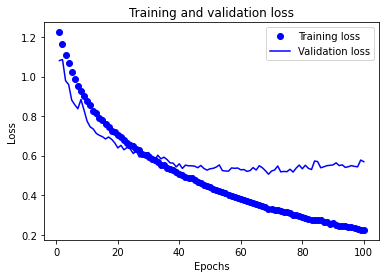

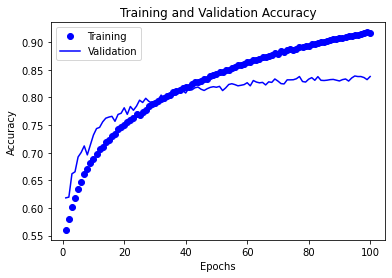

In [43]:
# Test Accuracy and Loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)

# Training and Validation Loss Plot
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf() # clear figure

# Training and Validation Accuracy Plot
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training')
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Add Data Augmentation and Fit to Model with Dropout

In [19]:
# Split Training Data into Train / Validation
train_images, vd_images, train_labels, vd_labels = train_test_split(train_images, train_labels, test_size=0.1)

# Data Augmentation
train_datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = train_datagen.flow(train_images, train_labels, batch_size=64)

# Fit Model with Dropout and Data Augmentation
steps = int(train_images.shape[0] / 64)
history = model.fit(train_generator, steps_per_epoch=steps, epochs=200, validation_data=(vd_images, vd_labels))

Epoch 1/200
415/415 [==============================] - 25s 61ms/step - loss: 1.6651 - accuracy: 0.3810 - val_loss: 1.5614 - val_accuracy: 0.4412
Epoch 2/200
415/415 [==============================] - 25s 60ms/step - loss: 1.5997 - accuracy: 0.4087 - val_loss: 1.4328 - val_accuracy: 0.4765
Epoch 3/200
415/415 [==============================] - 25s 61ms/step - loss: 1.5530 - accuracy: 0.4285 - val_loss: 1.4064 - val_accuracy: 0.4914
Epoch 4/200
415/415 [==============================] - 25s 60ms/step - loss: 1.5132 - accuracy: 0.4433 - val_loss: 1.3612 - val_accuracy: 0.4981
Epoch 5/200
415/415 [==============================] - 25s 61ms/step - loss: 1.4830 - accuracy: 0.4582 - val_loss: 1.3032 - val_accuracy: 0.5290
Epoch 6/200
415/415 [==============================] - 25s 61ms/step - loss: 1.4417 - accuracy: 0.4701 - val_loss: 1.3325 - val_accuracy: 0.5161
Epoch 7/200
415/415 [==============================] - 25s 60ms/step - loss: 1.4136 - accuracy: 0.4850 - val_loss: 1.2506 - val_ac

#### Display Results with Data Augmentation and Dropout

313/313 [==============================] - 3s 11ms/step - loss: 0.5406 - accuracy: 0.8264
Test Accuracy:  0.8263999819755554
Test Loss:  0.540565550327301


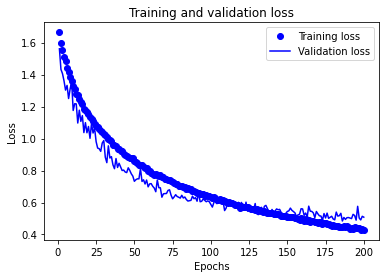

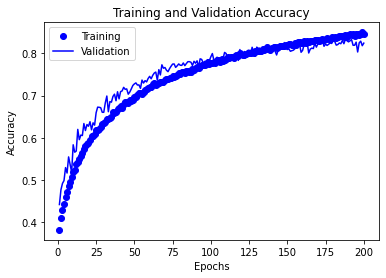

In [20]:
# Test Accuracy and Loss
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_acc)
print("Test Loss: ", test_loss)

# Training and Validation Loss Plot
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf() # clear figure

# Training and Validation Accuracy Plot
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training')
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Make Predictions

In [29]:
classes = {0:"airplane",
           1:"automobile",
           2:"bird",
           3:"cat",
           4:"deer",
           5:"dog",
           6:"frog",
           7:"horse",
           8:"ship",
           9:"truck"}

Prediction:  airplane


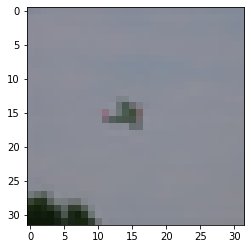

In [88]:
test_image = 97
plt.imshow(test_images[test_image])
print("Prediction: ", classes[model.predict_classes(test_images)[test_image]])

## ResNet50 Classifications

Prediction:  Egyptian_cat
Probability:  0.4700816


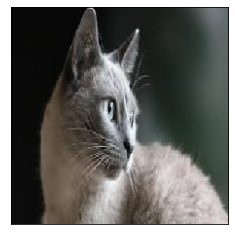

Prediction:  Shih-Tzu
Probability:  0.9032937


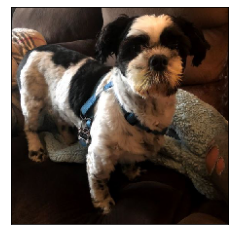

Prediction:  lynx
Probability:  0.9888205


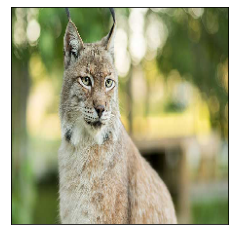

Prediction:  timber_wolf
Probability:  0.79464126


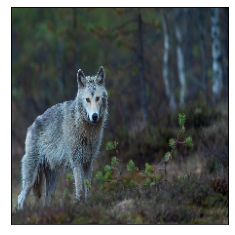

Prediction:  giant_panda
Probability:  0.9759375


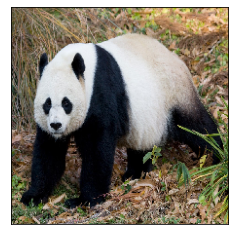

Prediction:  American_Staffordshire_terrier
Probability:  0.53104967


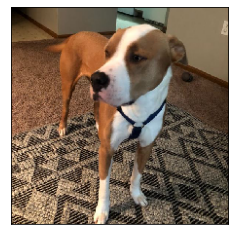

Prediction:  Shih-Tzu
Probability:  0.92910945


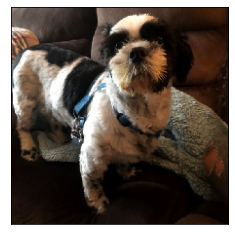

In [51]:
model = ResNet50(weights='imagenet')

images_plot = [] # Image arrays for plots
image_paths = []
predictions = []
pred_probs = []

current_dir = Path(os.getcwd()).absolute()
images_dir = current_dir.joinpath('images')
images_dir.mkdir(parents=True, exist_ok=True)

for img in next(os.walk(images_dir))[2]:
    
    # Get and save image path
    image_path = images_dir.joinpath(img)
    image_paths.append(image_path)
    
    # Load image
    img = image.load_img(image_path, target_size=(224,224))
    
    # Prep arrays for plotting
    image_array_plot = image.img_to_array(img)
    images_plot.append(image_array_plot)
    
    # Prep arrays for model predictions
    image_array_Res = image.img_to_array(img)
    image_array_Res = np.expand_dims(image_array_Res, axis=0)
    image_array_Res = preprocess_input(image_array_Res)
    image_array_Res = np.asarray(image_array_Res)
    
    # Get predictions and probabilities
    prediction_raw = model.predict(image_array_Res)
    prediction_decoded = decode_predictions(prediction_raw, top=1)[0][0][1]
    predictions.append(prediction_decoded)
    prediction_prob = decode_predictions(prediction_raw, top=1)[0][0][2]
    pred_probs.append(prediction_prob)
    
# Save prediction results to csv
df = pd.DataFrame({'Path': image_paths, 'Prediction': predictions, 'Probability': pred_probs})
df.to_csv('results/predictions/resnet50/results.csv', index=False)
    
# Prep images for plotting
images_plot = np.asarray(images_plot)
images_plot = images_plot.astype('float32') / 255

# Display Predictions
for i in range(len(image_paths)):
    plt.clf() # clear figure
    
    # Display top prediction
    print('Prediction: ', predictions[i])
    print('Probability: ', pred_probs[i])
    
    # Plot images
    plt.imshow(images_plot[i])
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)    
    plt.show()